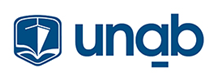
<center>Trabajo práctico Integrador</center>
<center>Seminario “Procesamiento de Lenguaje Natural”</center> 
<center>Diplomatura en Ciencias Sociales Computacionales.</center> 
<center>Universidad Nacional Guillermo Brown - UnaB.</center>


**Objetivo.**
El presente trabajo tiene como finalidad la integración y aplicación de las técnicas estudiadas durante el seminario con el fin de aprender en un caso de uso real extendido la aplicabilidad de las herramientas. 


**Consignas.**

## 1.	Scraping de Noticias. 
Hacer un scraping de 5 noticias seleccionadas de algunos de los siguientes portales.
<br>
a.	Infobae.<br>
b.	La Política Online.<br>
c.	Letra P<br>
d.	ADN Ciudad. <br>
e.	Portal de noticias a elección (sugerir).<br>
<br>
El sitio seleccionado es Infobae

In [1]:
#Una vez que tenemos todas las librerías, vamos a empezar importarlas
import requests
from bs4 import BeautifulSoup as bs4
import pandas as pd
from datetime import datetime,date
import spacy
from nltk.stem import WordNetLemmatizer
# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")


#### **01. Extracción básica de texto en la Web.**

Cuando trabajamos con *scraping*, tenemos que considerar la interpretación del *código* HTML. Este tipo de lenguaje es en el que se encuentran enmarcadas las plataformas y su correcto entendimiento nos va a permitir ir a buscar el texto o información que estamos buscando.

En este sentido, lo primero que debemos hacer es traernos el *HTML* entero que queremos inspeccionar.

In [2]:
# extraemos la respuesta del parametro que le pasamos, en este caso la url de infobae
response = requests.get (url='https://www.infobae.com/politica')

In [3]:
# transformamos la respuesta que nosotros le pasamos
texto_html = bs4(response.text,'lxml')

In [4]:
# Buscar los elementos <div> con la clase 'deck' que contienen los párrafos de las noticias
parrafos = texto_html.find_all('div', class_='deck')

In [5]:
# Obtener el texto de los párrafos y almacenarlos en una lista
lista_parrafos = [parrafo.get_text() for parrafo in parrafos]

In [6]:
# genero la fecha 
fecha = date.today().strftime('%d-%m-%Y')

In [7]:
# Obtener todos los elementos h2
titulo_tags = texto_html.find_all('h2')  
lista_titulos = [titulo.text for titulo in titulo_tags]

# Me Aseguro de que las listas tengan la misma longitud
min_length = min(len(lista_parrafos), len(lista_titulos))
lista_parrafos = lista_parrafos[:min_length]
lista_titulos = lista_titulos[:min_length]

df_parrafos = pd.DataFrame({'parrafo': lista_parrafos, 'titulo': lista_titulos})

# Filtrar las primeras 5 noticias
df_parrafos.head(5)


,parrafo,titulo
0,Todos los detalles de la campaña electoral en ...,"Elecciones 2023, en vivo: “Veo posible llegar ..."
1,"El funcionario judicial murió a los 54 años, p...",Dirigentes políticos y judiciales despidieron ...
2,"Aunque confiados en el impulso de las PASO, en...",Las claves de la estrategia de Milei: entre la...
3,"Cuando el ex presidente vuelva al país, la can...",Patricia Bullrich espera a Mauricio Macri para...
4,Son casi 4 millones de personas que no votaron...,Los votos del ausentismo que Sergio Massa inte...


In [8]:
# Calcular la cantidad de palabras de los párrafos y agregar una columna al DataFrame
df_parrafos['cant._palabras'] = df_parrafos['parrafo'].apply(lambda x: len(x.split()))

In [9]:
df_parrafos.head(5)

,parrafo,titulo,cant._palabras
0,Todos los detalles de la campaña electoral en ...,"Elecciones 2023, en vivo: “Veo posible llegar ...",23
1,"El funcionario judicial murió a los 54 años, p...",Dirigentes políticos y judiciales despidieron ...,32
2,"Aunque confiados en el impulso de las PASO, en...",Las claves de la estrategia de Milei: entre la...,46
3,"Cuando el ex presidente vuelva al país, la can...",Patricia Bullrich espera a Mauricio Macri para...,39
4,Son casi 4 millones de personas que no votaron...,Los votos del ausentismo que Sergio Massa inte...,31


## 2.	Escritura de archivo tipo Texto.
Las noticias descargadas deben entregarse en un archivo tipo texto. El código debe entregarse en una notebook con el código detallado y comentado.

In [14]:
# Guardar los datos en un archivo de texto
archivo_salida = 'noticias_politicas.txt'
with open(archivo_salida, 'w', encoding='utf-8') as archivo:
    for index, row in df_parrafos.head(5).iterrows():
        archivo.write(f"Título: {row['titulo']}\n")
        archivo.write(f"Párrafo: {row['parrafo']}\n")
        archivo.write("-" * 50 + "\n")

print(f"Los datos de las primeras 5 noticias se han guardado en el archivo '{archivo_salida}'")

Los datos de las primeras 5 noticias se han guardado en el archivo 'noticias_politicas.txt'


## 3.	Corpus entero.
Elaborar un data frame en donde cada fila corresponde a un párrafo de cada noticia que tenga la siguiente estructura.


In [12]:
# Definir la función para procesar un párrafo
def procesar_parrafo(parrafo):
    doc = nlp(parrafo)
    palabras_lematizadas = [token.lemma_ for token in doc]
    entidades = [ent.text for ent in doc.ents]
    return palabras_lematizadas, entidades

# Crear un DataFrame con los datos
df_parrafos = pd.DataFrame({'parrafo': lista_parrafos, 'titulo': lista_titulos})
df_parrafos['cant_palabras'] = df_parrafos['parrafo'].apply(lambda x: len(x.split()))
df_parrafos['entidad'] = df_parrafos['parrafo'].apply(lambda x: [token for token in nlp(x).ents])
df_parrafos['terminos_lematizados'], _ = zip(*df_parrafos['parrafo'].apply(procesar_parrafo))


In [11]:
# Mostrar la tabla
df_parrafos.head(5)

,parrafo,titulo,cant_palabras,entidad,terminos_lematizados
0,Todos los detalles de la campaña electoral en ...,"Elecciones 2023, en vivo: “Veo posible llegar ...",23,"[(Argentina), (Javier, Milei), (Primarias, Abi...","[todo, el, detalle, de, el, campaña, electoral..."
1,"El funcionario judicial murió a los 54 años, p...",Dirigentes políticos y judiciales despidieron ...,32,"[(Las, redes, sociales)]","[el, funcionario, judicial, morir, a, el, 54, ..."
2,"Aunque confiados en el impulso de las PASO, en...",Las claves de la estrategia de Milei: entre la...,46,"[(LLA), (Casa, Rosada), (Admiten)]","[aunque, confiar, en, el, impulso, de, el, PAS..."
3,"Cuando el ex presidente vuelva al país, la can...",Patricia Bullrich espera a Mauricio Macri para...,39,"[(Juntos, por, el, Cambio), (Qué), (Marruecos)...","[cuando, el, ex, presidente, volver, al, país,..."
4,Son casi 4 millones de personas que no votaron...,Los votos del ausentismo que Sergio Massa inte...,31,"[(provincia, de, Buenos, Aires)]","[ser, casi, 4, millón, de, persona, que, no, v..."
